<a href="https://colab.research.google.com/github/kumarakhansa/AITF_2026/blob/main/05_DATA_SCREENING/data_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sampel Data (5 Baris Pertama)
  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  

2. Dimensi Data (Baris, Kolom)
(200, 6)

3. Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours     

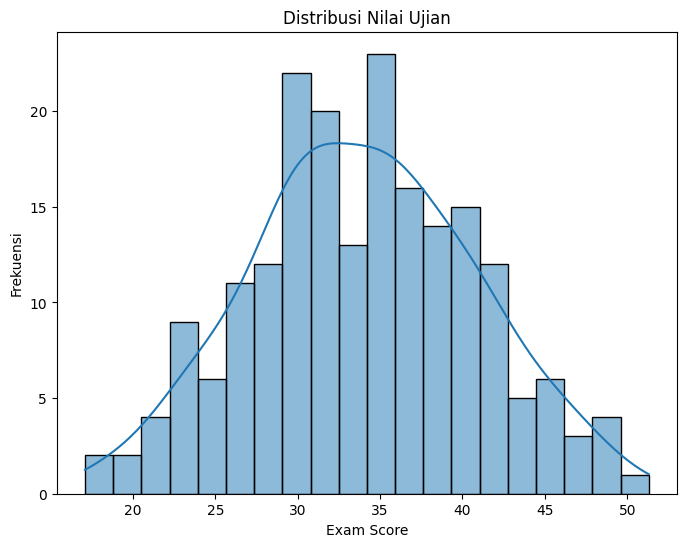


7. Korelasi Antar Variabel Numerik


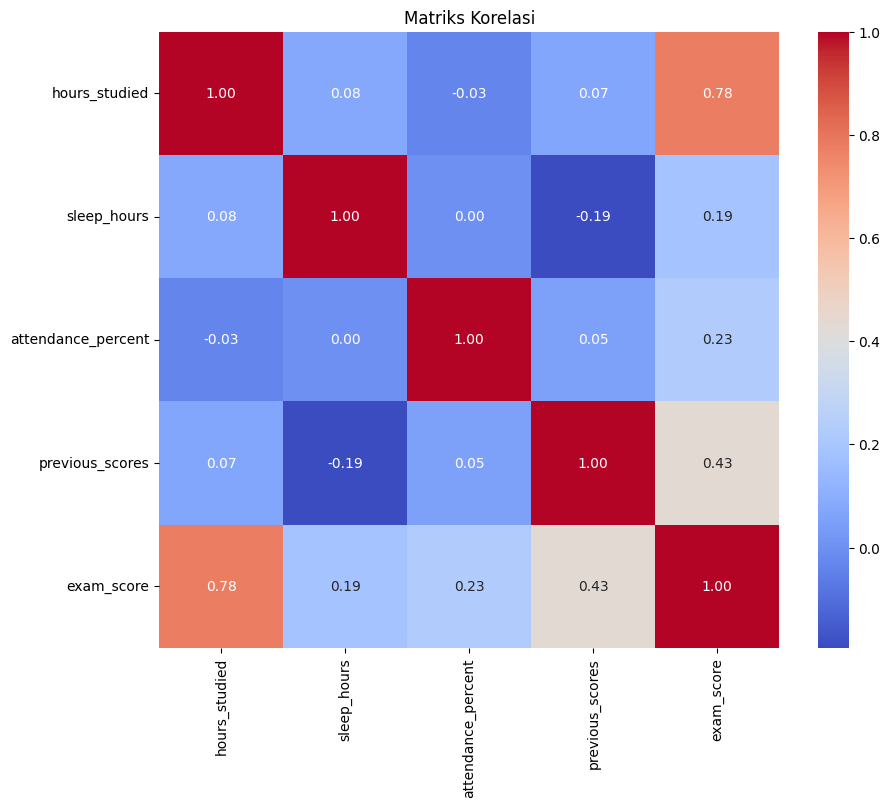


8. Scatter Plot: Hubungan Lama Belajar dengan Nilai Ujian


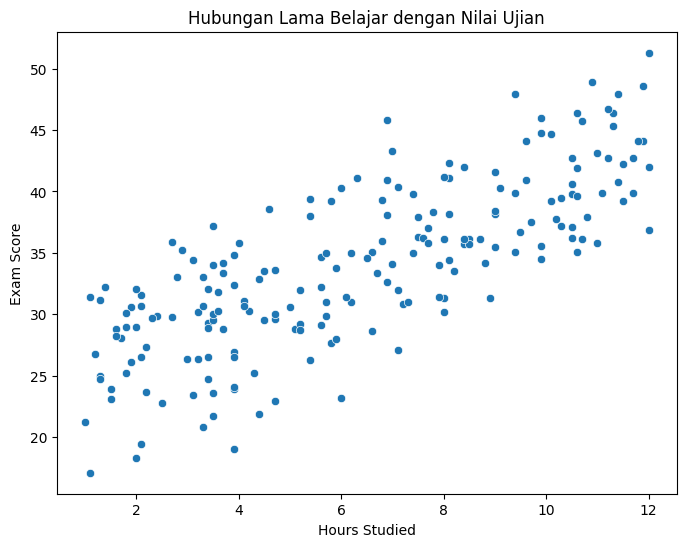


9. Deteksi Outlier Nilai Ujian


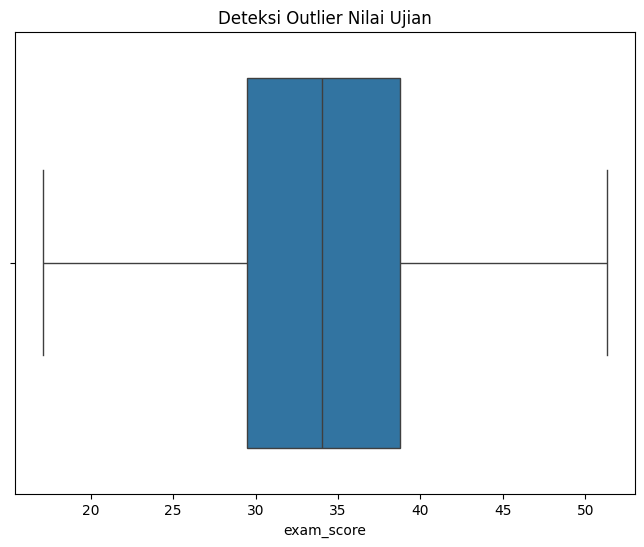

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/kumarakhansa/AITF_2026/refs/heads/main/01_DATA_SCRAPING/student_exam_scores.csv")

# 1. Sampel data
print("1. Sampel Data (5 Baris Pertama)")
print(df.head())

# 2. Dimensi data
print("\n2. Dimensi Data (Baris, Kolom)")
print(df.shape)

# 3. Struktur dan tipe data
print("\n3. Informasi Dataset")
df.info()

# 4. Statistik deskriptif
print("\n4. Statistik Deskriptif")
print(df.describe())

# 5. Jumlah nilai unik tiap kolom
print("\n5. Jumlah Nilai Unik Tiap Kolom")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

# 6. Distribusi nilai ujian\
print("\n6. Distribusi Nilai Ujian")
plt.figure(figsize=(8,6))
sns.histplot(df['exam_score'], kde=True, bins=20)
plt.title("Distribusi Nilai Ujian")
plt.xlabel("Exam Score")
plt.ylabel("Frekuensi")
plt.show()

# 7. Korelasi antar variabel numerik
print("\n7. Korelasi Antar Variabel Numerik")
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# 8. Scatter plot: Hubungan lama belajar dengan nilai ujian
print("\n8. Scatter Plot: Hubungan Lama Belajar dengan Nilai Ujian")
plt.figure(figsize=(8,6))
sns.scatterplot(x='hours_studied', y='exam_score', data=df)
plt.title("Hubungan Lama Belajar dengan Nilai Ujian")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

# 9. Deteksi outlier nilai ujian
print("\n9. Deteksi Outlier Nilai Ujian")
plt.figure(figsize=(8,6))
sns.boxplot(x=df['exam_score'])
plt.title("Deteksi Outlier Nilai Ujian")
plt.show()

In [2]:
# 1. Validasi missing values
print("1. Missing Values per Kolom")
missing_values = df.isnull().sum()
print(missing_values)

# 2. Validasi data duplikat
print("\n2. Data Duplikat")
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

# 3. Validasi rentang nilai ujian
print("\n3. Validasi Rentang Nilai Ujian")
min_score = df['exam_score'].min()
max_score = df['exam_score'].max()
print(f"Rentang nilai ujian: {min_score:.2f} - {max_score:.2f}")

if min_score < 0 or max_score > 100:
    print("Nilai ujian di luar rentang wajar!")
else:
    print("Nilai ujian berada dalam rentang wajar.")

# 4. Validasi nilai negatif pada fitur numerik
print("\n4. Validasi Nilai Negatif")
numeric_cols = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']
negative_check = (df[numeric_cols] < 0).sum()
print(negative_check)

# 5. Kesimpulan validasi otomatis
if missing_values.sum() == 0 and duplicate_rows == 0 and negative_check.sum() == 0:
    print("\nDataset valid dan siap digunakan untuk analisis lanjutan.")
else:
    print("\nDataset perlu pembersihan lebih lanjut.")

1. Missing Values per Kolom
student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

2. Data Duplikat
Jumlah baris duplikat: 0

3. Validasi Rentang Nilai Ujian
Rentang nilai ujian: 17.10 - 51.30
Nilai ujian berada dalam rentang wajar.

4. Validasi Nilai Negatif
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
dtype: int64

Dataset valid dan siap digunakan untuk analisis lanjutan.
